In [1]:
# stochastic algoritması

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import sys
sys.path.append("../../main/")
from pandas.core.indexing import maybe_convert_ix
import PredictionManager as pm
import backtest_class as backTest
import yFinance_class as yfHelper

In [4]:
userInput = "BNB-USD"
period = '1mo'
interval = '1d'

In [5]:
yData = yfHelper.yFinance(userInput.upper(), period, interval).getData()

[*********************100%***********************]  1 of 1 completed


In [6]:
yData

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-27,546.507874,571.548889,543.506348,562.641479,562.641479,2180356553
1,2021-12-28,563.590332,563.590332,530.059937,534.928040,534.928040,2791585162
2,2021-12-29,534.850037,540.615784,511.745331,514.000793,514.000793,2159325741
3,2021-12-30,514.570251,527.568298,509.003479,518.909729,518.909729,1950603827
4,2021-12-31,519.123047,527.697327,507.885712,511.708313,511.708313,2020489898
5,2022-01-01,511.910370,527.352722,511.903534,527.352722,527.352722,1622547014
6,2022-01-02,527.291626,533.371033,518.753540,531.396667,531.396667,1462276185
7,2022-01-03,531.388855,532.095581,510.652161,512.135986,512.135986,1949153130
8,2022-01-04,512.130310,519.701660,503.215363,507.506104,507.506104,2200879165
9,2022-01-05,507.597809,515.239197,462.057556,475.056946,475.056946,2870757788


In [7]:
prices = list(yData.Close)

In [8]:
def calculatestochastic(prices):
    stochasticlist = []
    for i in range(1, len(prices)-13):
        if i == 1:
            C = prices[-i]
            L14 = min(prices[-i-14:])
            H14 = max(prices[-i-14:])
            K = ((C-L14)/(H14-L14))*100
            stochasticlist.append(K)
        else:
            C = prices[-i]
            L14 = min(prices[-i-14:-i+1])
            H14 = max(prices[-i-14:-i+1])
            K = ((C-L14)/(H14-L14))*100
            stochasticlist.append(K)
    return stochasticlist   

In [9]:
def calculateslowstochastic(prices):
    sumK = 0
    smalist = calculatestochastic(prices)
    for i in (smalist):
        sumK = sumK + i
    itemlen = len(smalist)
    SMAK = sumK/itemlen
    return SMAK
calculateslowstochastic(prices)

32.823081971374855

In [10]:
len(calculatestochastic(prices))

18

In [11]:
sonuclist = [50,50,50,50,50,50,50,50,50,50,50,50,50,50]
for i in range(0,len(calculatestochastic(prices))):
    sonuclist.append(calculatestochastic(prices)[-i])

In [12]:
len(sonuclist)

32

In [13]:
cizimlist = []
for i in sonuclist:
    a = i/100+4
    cizimlist.append(a)

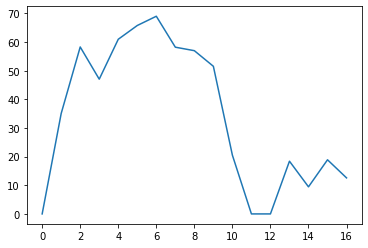

In [14]:
plt.plot(sonuclist[15:70])

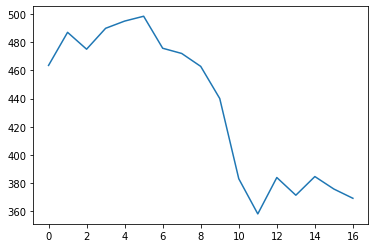

In [15]:
plt.plot(prices[15:70])

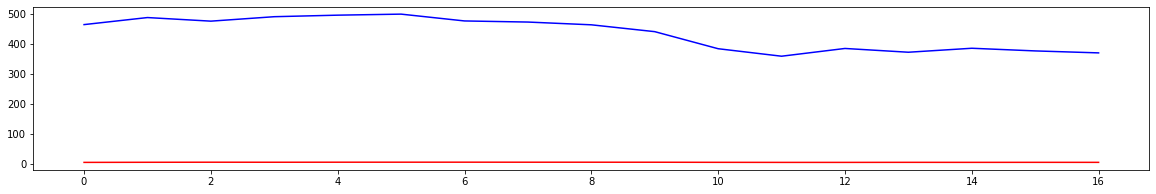

In [16]:
plt.figure(figsize=(20,3))
plt.plot(cizimlist[15:70],color="red")
plt.plot(prices[15:70],color="blue")

In [17]:
lower_band = 20
upper_band = 80
buy_price = []
sell_price = []
stochastic_signal = []
signal = 0

for element in range(0,len(sonuclist)):
    if ((sonuclist[element - 1] > lower_band) and (sonuclist[element] < lower_band)):
        if (signal != 1):
            buy_price.append(prices[element])
            sell_price.append(np.nan)
            signal = 1
            stochastic_signal.append(signal)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            stochastic_signal.append(0)

    elif ((sonuclist[element - 1] < upper_band) and (sonuclist[element] > upper_band)):
        if (signal != -1):
            buy_price.append(np.nan)
            sell_price.append(prices[element])
            signal = -1
            stochastic_signal.append(signal)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            stochastic_signal.append(0)
    else:
        buy_price.append(np.nan)
        sell_price.append(np.nan)
        stochastic_signal.append(0)

In [18]:
stochastic_signal

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [19]:
print(len(stochastic_signal))
len(prices)

32


32

In [20]:
buy_price

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 424.93377685546875,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [21]:
sell_price

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [22]:
investmenValue = yData['Close'][0] * 5
firstInvestment = investmenValue
decisionFlag = False
stockNumber = round(investmenValue / yData['Close'][0])



for i in range(0, len(stochastic_signal)):
    if (stochastic_signal[i] != 0):
        if (decisionFlag == False):
            if(stochastic_signal[i] == 1):
                decisionFlag = True
            elif(stochastic_signal[i] == -1):
                decisionFlag = True
                investmenValue = yData["Close"][i] * stockNumber    
        else:
            if (stochastic_signal[i] == 1):
                stockNumber = round(investmenValue / yData['Close'][i])
                investmenValue = 0
            elif (stochastic_signal[i] == -1):
                investmenValue = yData['Close'][i] * stockNumber
                stockNumber = 0
                    
if (investmenValue == 0):
    investmenValue = yData['Close'][len(yData) - 1] * stockNumber
    stockNumber = 0

In [23]:
print("% ",(investmenValue - firstInvestment) / firstInvestment * 100)
print(investmenValue - firstInvestment)

%  0.0
0.0
